In [90]:
import random
import itertools 
from itertools import combinations
import copy
import numpy as np

In [91]:
#得到不同维度下的所有0/1编码情况
def get_all_nums(dim):
    nums = [[0]*(dim+2-len(bin(i)))+[int(x) for x in list(bin(i))[2:]] for i in range(2**dim)]
    return nums
#进行模拟
def function(all_num,flag,all_num_co,dim):

    le=len(all_num)
    itera1=0
    for i in all_num_co:#一组生成的编码
        itera2=-1
        for j in i:#对每个编码进行考察
            itera2=itera2+1

            if flag[itera1][itera2]==0:#如果死亡则跳过
                continue 

            if sum(j)==dim:
                flag[itera1][itera2]=0
                all_num_co[itera1][itera2]=[0]*dim
                continue

            ii=list(copy.deepcopy(i))
            ii.remove(j)
            eee=np.sum(ii,axis=0)
            total=0

            for x in range(dim):
                if j[x]==0:

                     if eee[x]!=0:
                            total=total+1
            if total==0:
                flag[itera1][itera2]=0
                all_num_co[itera1][itera2]=[0]*dim

        itera1=itera1+1
    return all_num,flag,all_num_co

##  一、对特定二进制编码位数和特定物种数目进行模拟

In [92]:

dim=int(input("请输入二进制编码位数"))
num_of_species = int(input("请输入物种数目"))
iteration=20#模拟迭代次数

#得到所有0/1编码情况
nums =get_all_nums(dim)

请输入二进制编码位数3
请输入物种数目4


In [93]:
#随机生成的物种的所有组合情况
random_species= [list(w)for w in list(itertools.combinations(nums,num_of_species))]

flag=np.ones((len(random_species),num_of_species))
all_num_co=list(copy.deepcopy(random_species))

In [94]:
#进行迭代模拟
x,y,z=function(random_species,flag,all_num_co,dim)
for i in range(iteration):
    x,y,z=function(x,y,z,dim)

In [95]:

final_answer=[[] for i in range(num_of_species+1)]

for i in range(len(flag)):
    final_answer[int(sum(flag[i]))].append(random_species[i])

#打印各存活物种数目情况下的物种组合情况
idx=0
for i in final_answer:
    print('存活物种数目为',idx,'---------------')
    idx=idx+1
    for j in i:
        print(j)

存活物种数目为 0 ---------------
[[0, 0, 0], [0, 0, 1], [0, 1, 1], [1, 1, 1]]
[[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 1, 1]]
[[0, 0, 0], [0, 1, 0], [0, 1, 1], [1, 1, 1]]
[[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 1, 1]]
[[0, 0, 0], [1, 0, 0], [1, 0, 1], [1, 1, 1]]
[[0, 0, 0], [1, 0, 0], [1, 1, 0], [1, 1, 1]]
存活物种数目为 1 ---------------
存活物种数目为 2 ---------------
[[0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 1, 1]]
[[0, 0, 1], [1, 0, 0], [1, 0, 1], [1, 1, 1]]
[[0, 1, 0], [1, 0, 0], [1, 1, 0], [1, 1, 1]]
存活物种数目为 3 ---------------
[[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1]]
[[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 1, 1]]
[[0, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 1]]
[[0, 0, 0], [0, 0, 1], [1, 0, 0], [1, 1, 1]]
[[0, 0, 0], [0, 0, 1], [1, 1, 0], [1, 1, 1]]
[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]]
[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]
[[0, 0, 0], [0, 1, 0], [1, 0, 1], [1, 1, 1]]
[[0, 0, 0], [0, 1, 1], [1, 0, 0], [1, 1, 1]]
[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
[[0, 0, 0], [0, 1, 1], [1, 1, 0], [1, 1, 

### x为各存活数目下物种所占的比例，依次为0,1,2.....各物种的情况

In [96]:
x=[]
for i in range(num_of_species+1):
    x.append(len(final_answer[i]))
x=np.array(x)
x=x/len(flag)
print(x)

[0.08571429 0.         0.04285714 0.41428571 0.45714286]


#### y为生物总存活的概率

In [97]:
y=np.sum(flag)/(len(flag)*num_of_species)
print(y)

0.7892857142857143


##  二、对特定二进制编码位数下所有情况进行模拟

In [102]:
import matplotlib.pyplot as plt

dim=int(input("请输入二进制编码位数"))
iteration=20#模拟迭代次数


请输入二进制编码位数4


In [103]:
def function2(dim ,num_of_species):
    #得到所有0/1编码情况
    nums =get_all_nums(dim)
    #随机生成的物种的所有组合情况
    random_species= [list(w)for w in list(itertools.combinations(nums,num_of_species))]
    flag=np.ones((len(random_species),num_of_species))
    all_num_co=list(copy.deepcopy(random_species))
    #进行迭代模拟
    x,y,z=function(random_species,flag,all_num_co,dim)
    for i in range(iteration):
        x,y,z=function(x,y,z,dim)
    #得到模拟结果
    final_answer=[[] for i in range(num_of_species+1)]
    for i in range(len(flag)):
        final_answer[int(sum(flag[i]))].append(random_species[i])
    x=[]
    for i in range(num_of_species+1):
        x.append(len(final_answer[i]))
    x=np.array(x)
    x=x/len(flag)
    y=np.sum(flag)/(len(flag)*num_of_species)
    return y

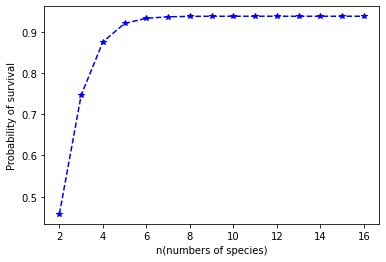

In [104]:
survival_probability=[]
for i in range(2,2**dim+1):
    survival_probability.append(function2(dim,i))
plt.plot(range(2,2**dim+1),survival_probability,'b--*')
plt.xlabel("n(numbers of species)")
plt.ylabel("Probability of survival")
plt.show()   